# House Prices Prediction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew

## Data Import

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Exploration

In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
train = df_train.copy()
test = df_test.copy()

In [8]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

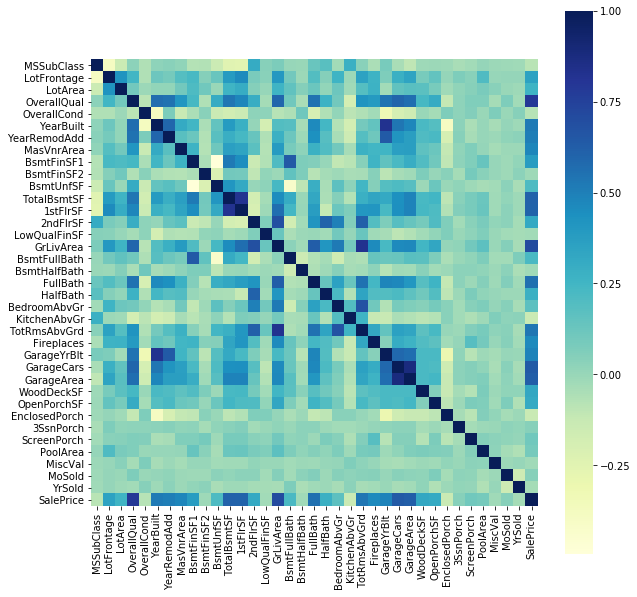

In [9]:
corrmat = train.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat,square=True, cmap="YlGnBu");

# Data Prep

### Check Outliers

There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students.

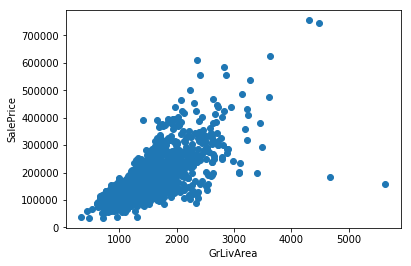

In [10]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

In [11]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

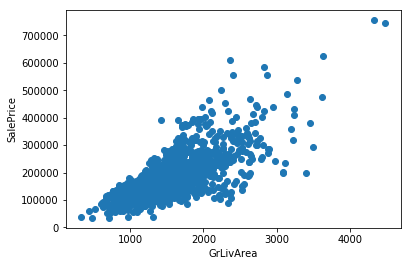

In [12]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

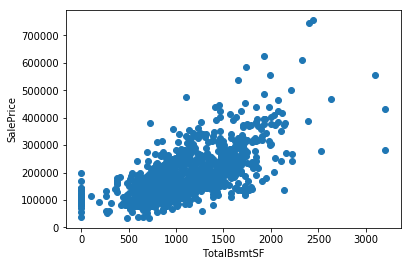

In [13]:
fig, ax = plt.subplots()
ax.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()

## Skewness

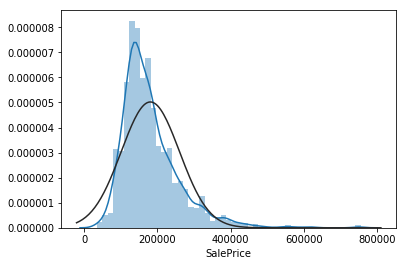

In [14]:
sns.distplot(train['SalePrice'] , fit=norm);

Positive Skewness, in order to perform better model, need transformation

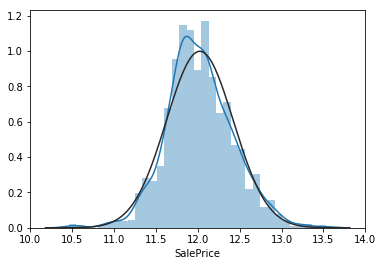

In [15]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);

In [16]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (2917, 79)


Combine Train and Test for Data Prepration

# Missing Value

In [17]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


In [18]:
for col in ("PoolQC", "MiscFeature", "Alley","Fence","FireplaceQu",
            'GarageType', 'GarageFinish','GarageQual', 'GarageCond','BsmtQual', 
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',"MasVnrType"):
    all_data[col] = all_data[col].fillna('None')

In [19]:
for col in ('GarageArea', 'GarageCars','BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',"MasVnrArea"):
    all_data[col] = all_data[col].fillna(0)

In [20]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [21]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['GarageYrBlt'].mode()[0])

In [22]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [23]:
all_data = all_data.drop(['Utilities'], axis=1)

In [24]:
all_data["Functional"] = all_data["Functional"].fillna("Typical")

In [25]:
for col in ('Electrical','KitchenQual','Exterior1st','Exterior2nd','SaleType'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

In [26]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [27]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

,Missing Ratio


In [28]:
all_data.shape

(2917, 78)

## Feature Engineering

In [29]:
all_data.columns.to_series().groupby(all_data.dtypes).groups

{dtype('int64'): Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'EnclosedPorch',
        'Fireplaces', 'FullBath', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
        'LotArea', 'LowQualFinSF', 'MSSubClass', 'MiscVal', 'MoSold',
        'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch',
        'TotRmsAbvGrd', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold'],
       dtype='object'),
 dtype('float64'): Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
        'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotFrontage', 'MasVnrArea',
        'TotalBsmtSF'],
       dtype='object'),
 dtype('O'): Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
        'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
        'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
        'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
        'GarageFinish', 'GarageQual',

int to O: 'MSSubClass','MoSold','YearBuilt','YearRemodAdd','YrSold',
<br>
float to O: 'GarageYrBlt'
<br>
int to Order: 'OverallCond','OverallQual',
<br>
O to Order: 'ExterQual', 'ExterCond','BsmtQual', 'BsmtCond','BsmtExposure',
            'BsmtFinType1', 'BsmtFinType2','HeatingQC', 'KitchenQual','FireplaceQu', 
            'GarageFinish', 'GarageQual','GarageCond','PoolQC',


In [30]:
all_data = all_data.replace({
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "No" : 1, "Mn" : 2, "Av": 3, "Gd" : 4},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "GarageFinish": {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3}}
                     )

In [31]:
for col in ('MSSubClass','MoSold','YearBuilt','YearRemodAdd','YrSold',
            'GarageYrBlt','OverallCond','OverallQual','ExterQual', 'ExterCond',
            'BsmtQual', 'BsmtCond','BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
            'HeatingQC', 'KitchenQual','FireplaceQu', 'GarageFinish', 'GarageQual',
            'GarageCond','PoolQC'):
    all_data[col] = all_data[col].astype(str)

In [32]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [33]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [34]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 28 skewed numerical features to Box Cox transform


In [35]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2917, 626)


In [36]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [37]:
train.shape

(1458, 626)

In [38]:
test.shape

(1459, 626)

In [39]:
train['SalePrice'] = y_train

C:\Study\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,YearRemodAdd_2007,YearRemodAdd_2008,YearRemodAdd_2009,YearRemodAdd_2010,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SalePrice
0,11.692623,11.686189,0.0,1.540963,11.170327,0.0,0.730463,0.000000,7.483296,0.000000,...,0,0,0,0,0,0,1,0,0,12.247699
1,12.792276,0.000000,0.0,1.540963,12.062832,0.0,0.000000,0.730463,8.897844,0.000000,...,0,0,0,0,0,1,0,0,0,12.109016
2,11.892039,11.724598,0.0,1.540963,10.200343,0.0,0.730463,0.000000,9.917060,0.000000,...,0,0,0,0,0,0,1,0,0,12.317171
3,12.013683,11.354094,0.0,1.540963,8.274266,0.0,0.730463,0.000000,10.468500,8.797736,...,0,0,0,0,1,0,0,0,0,11.849405
4,12.510588,12.271365,0.0,1.820334,10.971129,0.0,0.730463,0.000000,10.221051,0.000000,...,0,0,0,0,0,0,1,0,0,12.429220


## Modeling

In [41]:
import h2o
from h2o.automl import H2OAutoML

In [42]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) Client VM (build 25.161-b12, mixed mode)


C:\Study\anaconda\lib\site-packages\h2o\backend\server.py:258: UserWarning:   You have a 32-bit version of Java. H2O works best with 64-bit Java.
  Please download the latest 64-bit Java SE JDK from Oracle.

  warn("  You have a 32-bit version of Java. H2O works best with 64-bit Java.\n"


  Starting server from C:\Study\anaconda\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ziyi\AppData\Local\Temp\tmpexvmvbcd
  JVM stdout: C:\Users\Ziyi\AppData\Local\Temp\tmpexvmvbcd\h2o_Ziyi_started_from_python.out
  JVM stderr: C:\Users\Ziyi\AppData\Local\Temp\tmpexvmvbcd\h2o_Ziyi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.5
H2O cluster version age:,20 days
H2O cluster name:,H2O_from_python_Ziyi_mq7umm
H2O cluster total nodes:,1
H2O cluster free memory:,247.5 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [43]:
htrain = h2o.H2OFrame(train)
htest = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [44]:
x = htrain.columns
y = "SalePrice"
x.remove(y)

# Run AutoML for 300 seconds
aml = H2OAutoML(max_runtime_secs = 300)
aml.train(x = x, y = y,
          training_frame = htrain)

AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


30s, 60s, 300s is the best

In [45]:
lb = aml.leaderboard
lb

model_id,mean_residual_deviance,rmse,mae,rmsle
StackedEnsemble_AllModels_0_AutoML_20180418_223302,0.0151688,0.123161,0.0850456,0.00957554
StackedEnsemble_BestOfFamily_0_AutoML_20180418_223302,0.0153545,0.123913,0.0858103,0.00963375
GLM_grid_0_AutoML_20180418_223302_model_0,0.0173245,0.131622,0.0932789,0.0102105
GBM_grid_0_AutoML_20180418_223302_model_1,0.0191209,0.138278,0.0963355,0.0107509
GBM_grid_0_AutoML_20180418_223302_model_3,0.0192394,0.138706,0.0964868,0.0107899
GBM_grid_0_AutoML_20180418_223302_model_0,0.0194286,0.139386,0.0964544,0.0108375
GBM_grid_0_AutoML_20180418_223302_model_2,0.0194587,0.139494,0.0964702,0.0108528
DRF_0_AutoML_20180418_223302,0.024759,0.15735,0.108501,0.012208
XRT_0_AutoML_20180418_223302,0.0248399,0.157607,0.109175,0.0122385
GBM_grid_0_AutoML_20180418_223302_model_4,0.0255152,0.159735,0.113555,0.0123666


In [46]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_0_AutoML_20180418_223302
No model summary for this model


ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.00392167144233868
RMSE: 0.06262325001418148
MAE: 0.04450757419963453
RMSLE: 0.004861389351147288
R^2: 0.9757989986818404
Mean Residual Deviance: 0.00392167144233868
Null degrees of freedom: 1167
Residual degrees of freedom: 1161
Null deviance: 189.26953411718023
Residual deviance: 4.580512244651579
AIC: -3141.524785194192

ModelMetricsRegressionGLM: stackedensemble
** Reported on validation data. **

MSE: 0.012780872318675685
RMSE: 0.11305252017834758
MAE: 0.07917783826800437
RMSLE: 0.008932840264166277
R^2: 0.9141842314060931
Mean Residual Deviance: 0.012780872318675685
Null degrees of freedom: 289
Residual degrees of freedom: 283
Null deviance: 43.596567593919254
Residual deviance: 3.7064529724159487
AIC: -425.35926772756073

ModelMetricsRegression

In [47]:
preds = aml.leader.predict(htest)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [48]:
preds.head()

predict
11.7364
11.9423
12.1521
12.208
12.1898
12.0433
12.0187
12.0494
12.119
11.7253


## Export

In [50]:
h2o.h2o.export_file(preds,"preds.csv" )

Export File progress: |███████████████████████████████████████████████████| 100%


In [51]:
pred =pd.read_csv("preds.csv")

In [52]:
pred.head()

,predict
0,11.736400
1,11.942337
2,12.152102
3,12.208013
4,12.189795


In [53]:
pred["SalePrice"] = np.expm1(pred["predict"])

In [54]:
final = pd.DataFrame()

In [55]:
final['Id'] = df_test['Id']

In [56]:
final['SalePrice'] =pred['SalePrice']

In [57]:
final.tail()

,Id,SalePrice
1454,2915,83181.380744
1455,2916,82710.132329
1456,2917,152829.352205
1457,2918,116441.612813
1458,2919,210841.174419


In [58]:
final.to_csv("DMProject.csv",sep=",",index=False)

In [59]:
h2o.cluster().shutdown(prompt=True)

Are you sure you want to shutdown the H2O instance running at http://127.0.0.1:54321 (Y/N)? y
H2O session _sid_b156 closed.
